In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Завантажити дані, вивести назви колонок і розмір датасета

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
data.shape

(2000, 21)

## Опрацювати пропуски (по можливості заповнити їх або видалити)

In [6]:
missing_values = data.isnull().sum()
print("\nКількість пропущених значень в кожній колонці:")
print(missing_values)


Кількість пропущених значень в кожній колонці:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


## Як бачимо немає даних які пропущені, тож заповнювати їх, або видаляти не потрібно.

## 3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

In [7]:
data.corr().style.background_gradient(cmap='OrRd')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


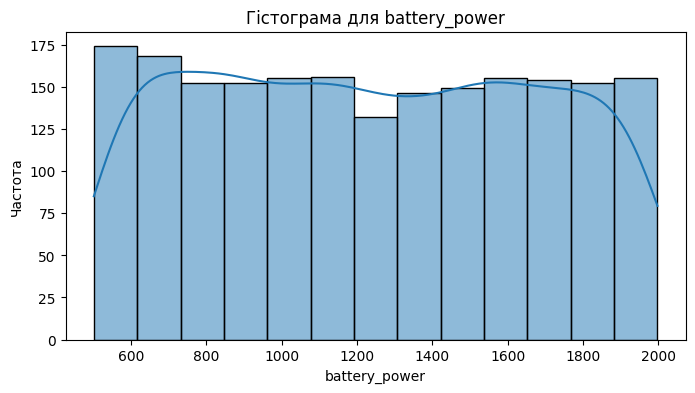

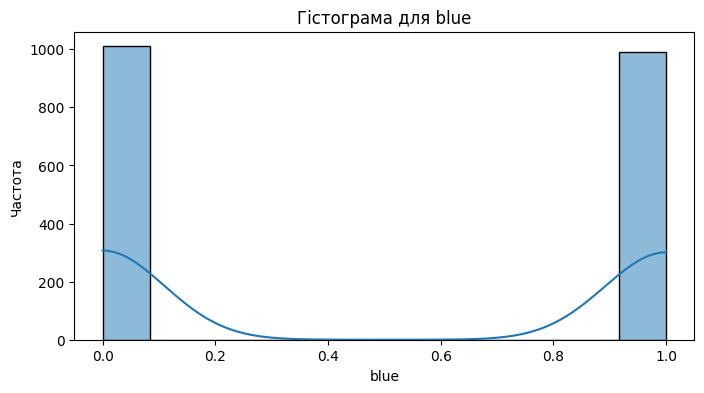

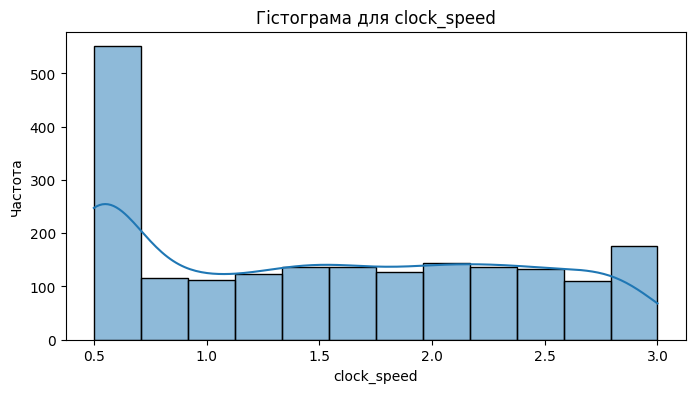

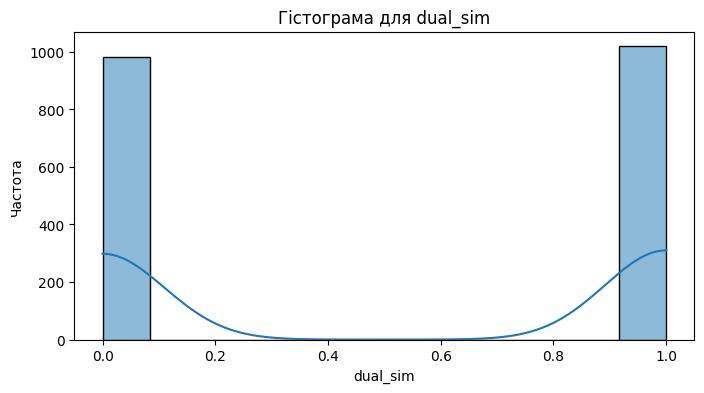

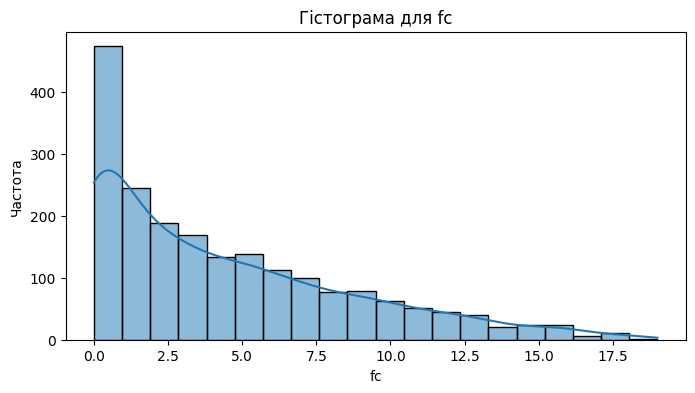

In [8]:
features = data.columns[:5]
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Гістограма для {feature}")
    plt.xlabel(feature)
    plt.ylabel("Частота")
    plt.show()

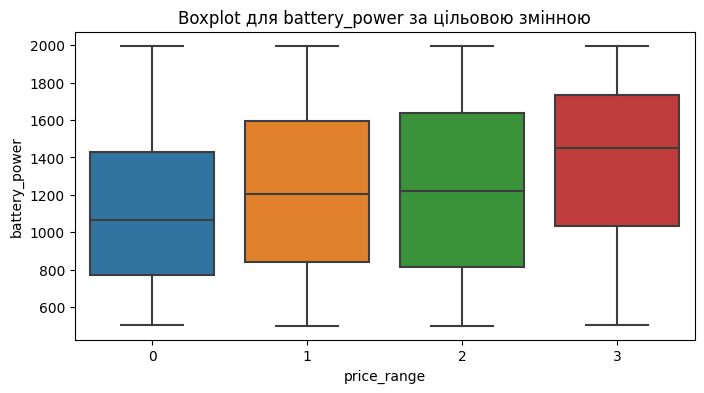

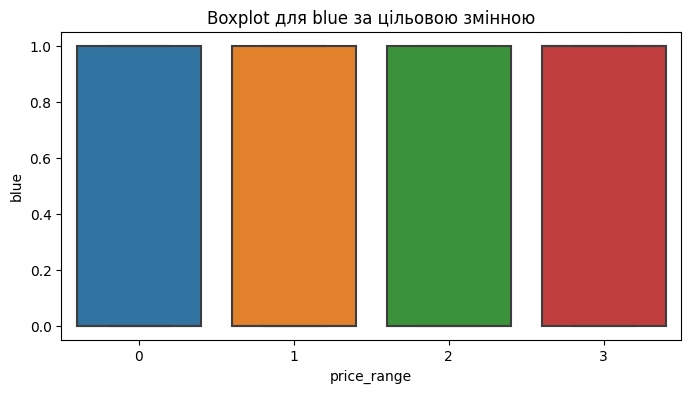

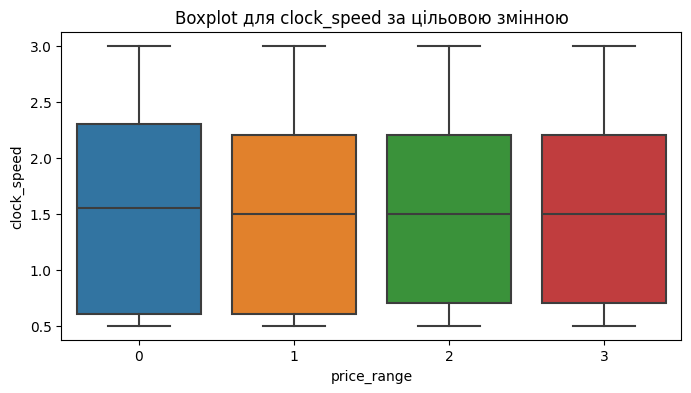

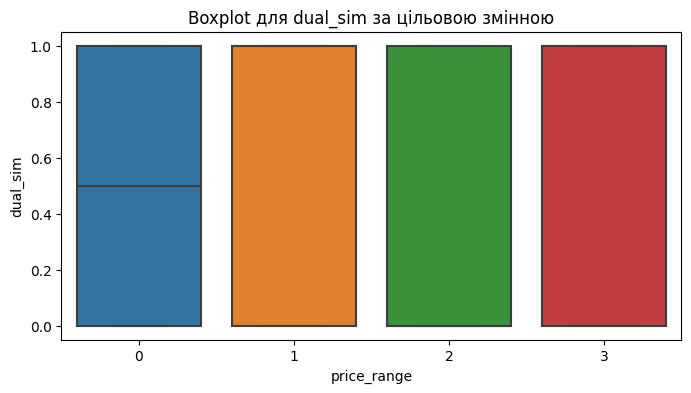

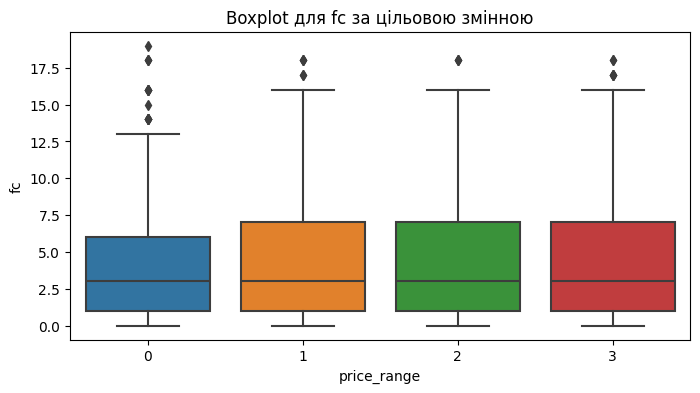

In [9]:
features = data.columns[:5]
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="price_range", y=feature, data=data)
    plt.title(f"Boxplot для {feature} за цільовою змінною")
    plt.xlabel("price_range")
    plt.ylabel(feature)
    plt.show()

In [10]:
X = data[features].values
y = data['price_range'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

scaled_data = pd.DataFrame(X_scaled, columns=features)

print(scaled_data.head())

   battery_power  blue  clock_speed  dual_sim        fc
0       0.227789   0.0         0.68       0.0  0.052632
1       0.347361   1.0         0.00       1.0  0.000000
2       0.041416   1.0         0.00       1.0  0.105263
3       0.076152   1.0         0.80       0.0  0.000000
4       0.881764   1.0         0.28       0.0  0.684211


## 5) Провести навчання наступних класифікаторів:kNN, дерево прийняття рішень, SVM, Random Forest, AdaBoost
## Підібрати оптимальні параметри
## • для kNN
## • для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»
## Серед обраних оптимальних моделей кожного класу вибрати найкращу.
## Відобразити sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix

## Розподіл вибірки на навчання та перевірку.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3,stratify=y)

## Навчання класифікатора дерево прийняття рішень

In [12]:
DS_classifier = DecisionTreeClassifier().fit(X_train,y_train)

## Навчання класифікатора Random Forest

In [13]:
RF_classifier = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

## Навчання класифікатора AdaBoost

In [14]:
AdaBoost_classifier = AdaBoostClassifier(n_estimators=100).fit(X_train,y_train)

## Підбір оптимального k-значення для kNN

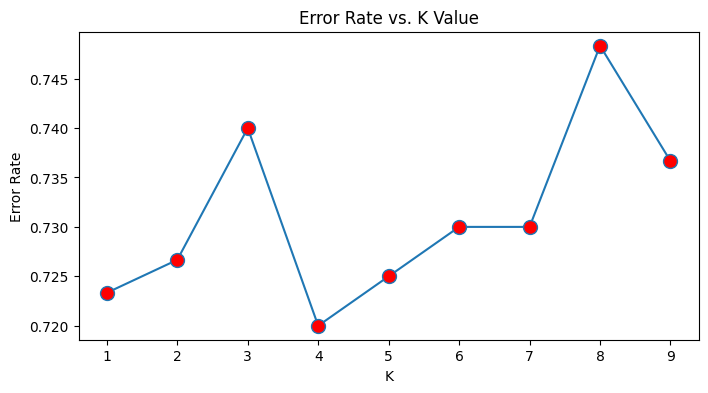

Optimal n_neighbors: 4


In [15]:
error_rate = [np.mean(KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train).predict(X_test) != y_test) for i in range(1, 10)]
optimal_n_neighbors = error_rate.index(min(error_rate)) + 1

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), error_rate, marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

print(f"Optimal n_neighbors: {optimal_n_neighbors}")


In [16]:
opt_k = 4
knn_classifier = KNeighborsClassifier(n_neighbors=opt_k)
knn_classifier.fit(X_train, y_train) 


KNeighborsClassifier(n_neighbors=4)

In [17]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

## Навчання класифікатора SVC з оптимальними "С" та gamma

In [18]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1, kernel='sigmoid')


In [19]:
svm_classifier = SVC(C=10, gamma=0.1, kernel='sigmoid').fit(X_train, y_train)

## Відображення sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix

In [20]:
models = {
    'SVM': svm_classifier,
    'KNN': knn_classifier,
    'Random Forest': RF_classifier,
    'Decision Tree': DS_classifier,
    'AdaBoost': AdaBoost_classifier
}

results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    reports = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'classification_report': reports,
        'confusion_matrix': confusion
    }

SVM
              precision    recall  f1-score   support

           0       0.31      0.61      0.41       150
           1       0.38      0.05      0.09       150
           2       0.16      0.03      0.05       150
           3       0.36      0.61      0.45       150

    accuracy                           0.33       600
   macro avg       0.30      0.33      0.25       600
weighted avg       0.30      0.33      0.25       600



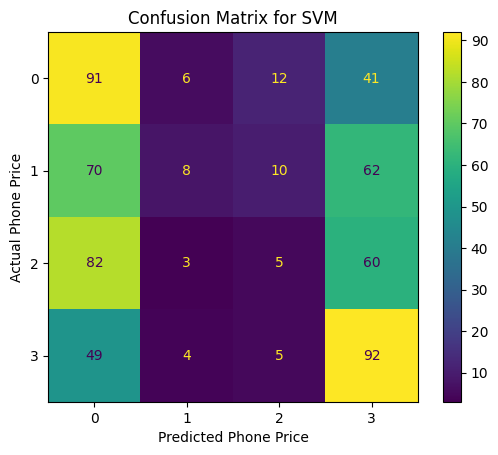

KNN
              precision    recall  f1-score   support

           0       0.28      0.43      0.34       150
           1       0.27      0.23      0.25       150
           2       0.25      0.23      0.24       150
           3       0.33      0.22      0.27       150

    accuracy                           0.28       600
   macro avg       0.28      0.28      0.27       600
weighted avg       0.28      0.28      0.27       600



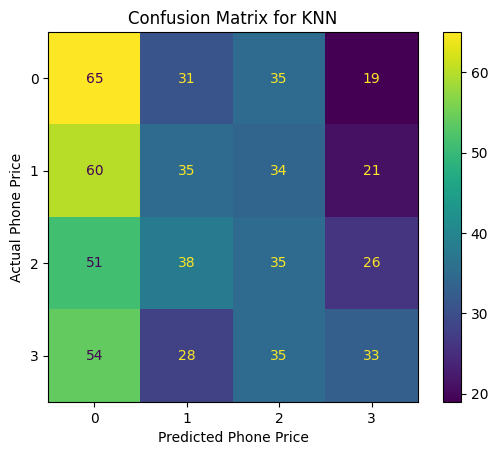

RF
              precision    recall  f1-score   support

           0       0.28      0.32      0.30       150
           1       0.26      0.25      0.25       150
           2       0.25      0.26      0.26       150
           3       0.33      0.29      0.31       150

    accuracy                           0.28       600
   macro avg       0.28      0.28      0.28       600
weighted avg       0.28      0.28      0.28       600



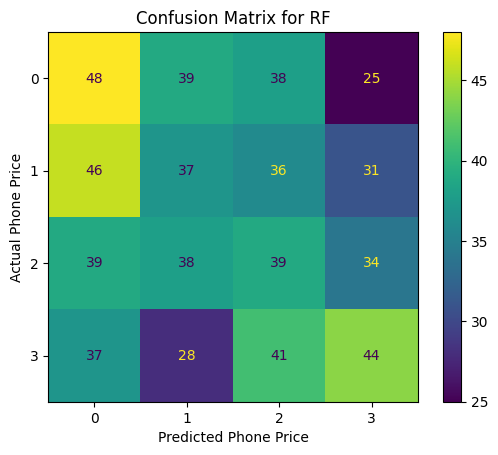

DS
              precision    recall  f1-score   support

           0       0.28      0.32      0.30       150
           1       0.27      0.27      0.27       150
           2       0.26      0.25      0.26       150
           3       0.37      0.34      0.36       150

    accuracy                           0.29       600
   macro avg       0.30      0.30      0.30       600
weighted avg       0.30      0.29      0.30       600



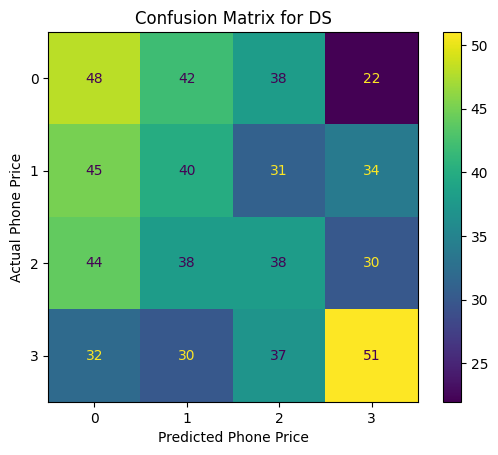

AdaBoost
              precision    recall  f1-score   support

           0       0.28      0.35      0.32       150
           1       0.23      0.16      0.19       150
           2       0.34      0.23      0.27       150
           3       0.35      0.49      0.41       150

    accuracy                           0.31       600
   macro avg       0.30      0.31      0.30       600
weighted avg       0.30      0.31      0.30       600



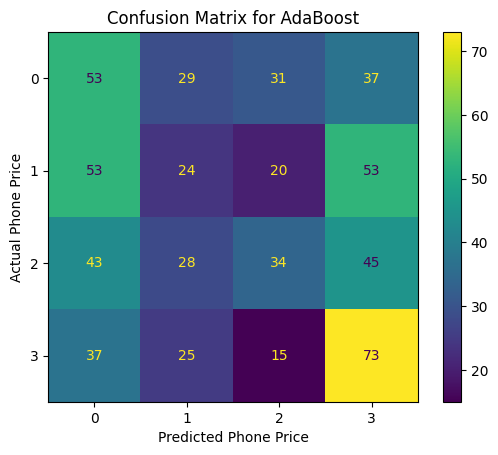

In [21]:
models = {
    'SVM': svm_classifier,
    'KNN': knn_classifier,
    'RF': RF_classifier,
    'DS': DS_classifier,
    'AdaBoost': AdaBoost_classifier
}

for model_name, model in models.items():
    print(model_name)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)
    
    cmd_obj = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_)
    cmd_obj.plot()
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Phone Price')
    plt.ylabel('Actual Phone Price')
    plt.show()

## 5.4 Вибір найкращої моделі
## Найкраще значення в Recall = 0.61 за допомогою SVM. Тому ця модель є найкращою.